# Détection de la première exoplanète, 51 Pegasi b

## Contexte

L'atelier principal portait sur l'analyse de données d'imagerie.
Les séries temporelles sont un autre type de données très communs en astronomie.
Il s'agit simplement d'une série de valeurs $y$ qui varient en fonction du temps.
$y$ peut être différentes quantités telles que la vitesse d'un objet, sa position ou sa luminosité.

### Méthode des vitesses radiales

Les deux principales [méthodes de détection](https://en.wikipedia.org/wiki/Methods_of_detecting_exoplanets) d'[exoplanètes](https://fr.wikipedia.org/wiki/Exoplan%C3%A8te) reposent sur l'analyse de séries temporelles.
La première, la [méthode des transits](https://en.wikipedia.org/wiki/Astronomical_transit), consiste à obtenir plusieurs images en fonction du temps, calculer la photométrie pour chaque image pour obtenir une _courbe de lumière_.
On analyse ensuite cette courbe de lumière pour chercher une diminution de lumière associée à une planète passant entre son étoile et nous.
La deuxième méthode est celle des [vitesses radiales](https://en.wikipedia.org/wiki/Doppler_spectroscopy) (aussi appelée vélocimétrie, ou spectroscopie Doppler).
Avec cette méthode, on obtient plusieurs spectres de l'étoile à travers le temps.
Pour chacun de ces spectres, on mesure le décalage en longueur d'onde dû à l'effet Doppler.
On peut ensuite convertir ce décalage en une mesure de la vitesse de l'étoile.
On obtient donc une série temporelle mesurant la _vitesse radiale_ de l'étoile en fonction temps.
Par _vitesse radiale_, on fait référence à la composante du vecteur de vitesse qui est parallèle à notre ligne de vue.
Ces mesures de vitesse, si elles sont assez précises, nous permettent de détecter le mouvement de l'étoile autour de son centre de masse causé par la force gravitationnelle d'une ou plusieurs planètes.
Ce GIF résume assez bien la méthode: [GIF](https://upload.wikimedia.org/wikipedia/commons/c/c8/Exoplanet_radial_velocity_doppler_spectroscopy_dark.gif).

### 51 Pegasi b

C'est la méthode des vitesses radiales qui a permis de détecter la première exoplanète autour d'une étoile similaire au Soleil, [51 Peg](https://fr.wikipedia.org/wiki/51_Pegasi_b).
51 Pegasi b est une _Jupiter chaude_: elle a environ la taille de Jupiter, mais orbite très près de son étoile.
Elle en fait le tour en environ 4 jours.
Pour plus d'information sur la planète, vous pouvez consulter [sa page Wikipédia](https://fr.wikipedia.org/wiki/51_Pegasi_b) ou sa page sur l'[_Exoplanet archive_ de la NASA](https://exoplanetarchive.ipac.caltech.edu/overview/51%20Pegasi).

Dans ce cahier, nous utiliserons des données de vitesses radiales pour détecter le signal de 51 Pegasi b.

## Importation des données

Sur l'archive de la NASA, on retrouve plusieurs ensembles de données.
Nous téléchargerons celui de Butler et al. (2006).
Vous pouvez le télécharger directement au lien suivant: <https://exoplanetarchive.ipac.caltech.edu/data/ExoData/0113/0113357/data/UID_0113357_RVC_001.tbl>.
Ces données sont sous forme de tableau ASCII.
Le module [`table`](https://docs.astropy.org/en/latest/table/index.html) d'Astropy est généralement capable de lire ce format via `Table.read()`.

In [1]:
from astropy.table import Table

data_path = "./data/UID_0113357_RVC_001.tbl"

tbl = Table.read(data_path, format="ascii")
tbl.pprint(max_lines=10)

      JD       Radial_Velocity Radial_Velocity_Uncertainty
     days           m / s                 m / s           
-------------- --------------- ---------------------------
2450002.665695           -52.9                         4.1
 2450002.68434           -45.8                         4.8
           ...             ...                         ...
2452184.776157             3.9                         5.5
2452189.678866           -37.8                         5.9
2452189.707882           -46.2                         6.0
Length = 256 rows


Les tableaux Astropy fonctionnent un peu comme un dictionnaire.
On accède à chaque colonne via une clé (le nom de la colonne).
On voit ci-dessus que le tableau contient le temps en [jours juliens](https://fr.wikipedia.org/wiki/Jour_julien), ainsi que la vitesse et son incertitude en m/s.

### Conversion vers NumPy

On peut ensuite convertir les colonnes vers un tableau NumPy avec l'attribut `.data`.

In [2]:
t = tbl["JD"].data
rv =  tbl["Radial_Velocity"].data
erv =  tbl["Radial_Velocity_Uncertainty"].data

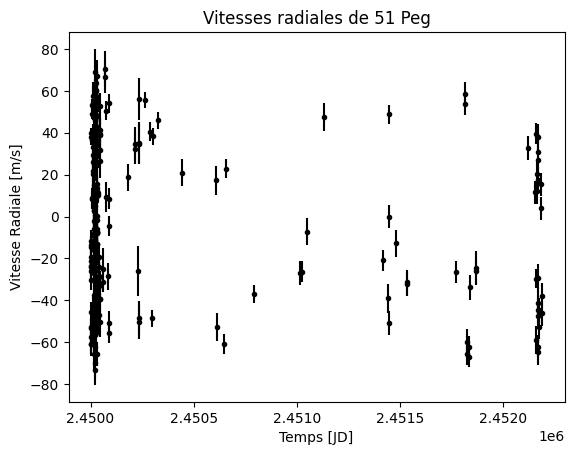

In [3]:
import matplotlib.pyplot as plt
plt.errorbar(t, rv, erv, fmt="k.")
plt.xlabel("Temps [JD]")
plt.ylabel("Vitesse Radiale [m/s]")
plt.title("Vitesses radiales de 51 Peg")
plt.show()

### Décalage en temps

La première chose qu'on peut faire est de définir un décalage `t0` pour réduire la valeur absolue du temps. C'est simplement une façon d'améliorer l'affichage.

In [4]:
t_jd = t.copy()
t0 = 2450000
t = t - t0

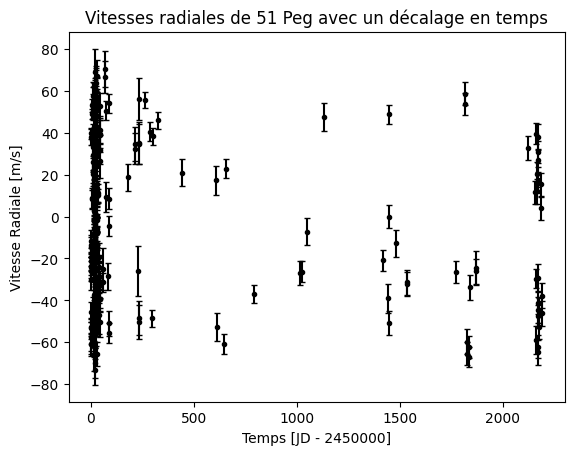

In [5]:
plt.errorbar(t, rv, erv, fmt="k.", capsize=2)
plt.xlabel(f"Temps [JD - {t0}]")
plt.ylabel("Vitesse Radiale [m/s]")
plt.title("Vitesses radiales de 51 Peg avec un décalage en temps")
plt.show()

### Visualisation en années

L'échelle de temps en jours juliens n'est pas particulièrement intuitive.
On peut les convertir en années via le module [`time`](https://docs.astropy.org/en/stable/time/index.html) d'Astropy.

In [6]:
from astropy.time import Time
yr = Time(t_jd, format="jd").decimalyear

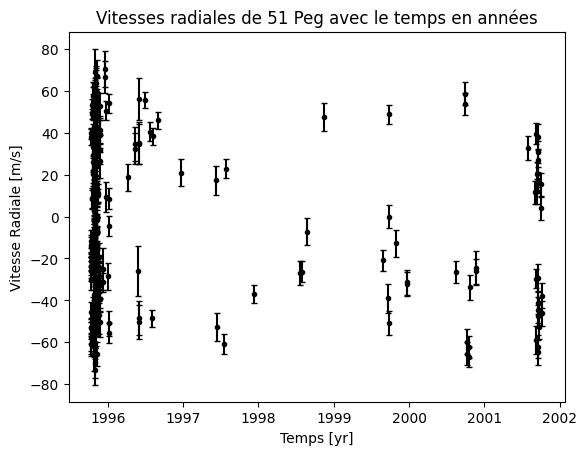

In [7]:
plt.errorbar(yr, rv, erv, fmt="k.", capsize=2)
plt.xlabel("Temps [yr]")
plt.ylabel("Vitesse Radiale [m/s]")
plt.title("Vitesses radiales de 51 Peg avec le temps en années")
plt.show()

## Visualisation des données

### Zoom sur un intervalle restreint

Il est difficile de voir si un signal quelconque se cache dans les données visuellement, car elles s'étalent sur plusieurs années.
Comme mentionné plus haut, le signal de 51 peg b est de quelques jours seulement.
L'échantillonnage semble meilleur au début de la série temporelle. On peut regarder de plus près.

**Exercice: Zoomez sur les premiers jours pour voir si un signal pourrait se cacher dans les données.**

In [8]:
# TODO: Zoom

On voit effectivement ce qui s'apparente à un sinusoïde.

### Données repliées sur la phase

Une autre façon de visualiser des données périodique est de les replier sur la phase du signal.
La phase est définie comme:
$$
\phi = \frac{t \% P}{P}
$$
où $P$ est la période et $\%$ l'opérateur "modulo".
Le modulo donne le reste, de sorte que $5 \% 4 = 1$, $8 = \% 3 = 2$, etc.

Si on connaît la période d'un signal, on peut donc convertir le temps associé à chaque vitesse en phase et afficher la vitesse en fonction de la phase.
Dans le cas de 51 Peg b, on peut utiliser la période donnée sur l'archive de la NASA.
Dans une situation où l'on cherche un planète inconnue, on ne pourrait bien sûr pas utiliser une telle valeur de période et il faudrait attendre la fin de l'analyse avant de replier les données ainsi.

**Exercice: Calculez la phase des données et affichez les vitesses en fonction de la phase**

In [9]:
# TODO: Phase-fold

## Définition d'un modèle

L'excentricité de 51 Peg b n'est pas trop forte, donc on devrait pouvoir approximer ce signal par un sinus.

**Exercice: Calculez un modèle sinusoïde et affichez le par dessus les données pour l'affichage utilisez l'intervalle de temps « zoomé » ci-dessus.**

<details>
    <summary>Cliquez pour des indices</summary>

    - Pour calculer le modèle, utilisez un tableau de temps plus fin. Il faudra au moins quelques miliers de points (j'en ai 100 000 dans la vesion finale).
    - Le sinus devrait avoir trois paramètres: amplitude, période et phase
    - Ajustez manuellement les valeurs de paramètres pour obtenir un modèle qui ne passe pas trop loin des données.

</details>

In [10]:
# TODO: model and plot

## Graphique avec les résidus

Lorsqu'on modélise une série temporelle, il est commun d'afficher également les résidus du modèle, soit la différence entre les données et ce que le modèle prédit:

$$
\text{Résidus} = y_{\text{data}} - y_{\text{model}}.
$$

Dans notre cas $y$ est la vitesse radiale.

**Exercice: Répétez le graphique précédent, mais ajoutez un panneau avec les résidus. Pour calculer les résidus, il faudra comparer le modèle exactement aux mêmes temps que les données. Je suggère de calculer le modèle deux fois: une fois pour l'affichage avec beaucoup de valeurs de temps et une fois pour le calcul des résidus, uniquement au temps des données**

In [11]:
# TODO: Residuals

## Évaluation du modèle

Les valeurs de test que nous avons définies ci-dessus ne sont pas optimales.
Il est possible d'automatiser la recherche des meilleurs paramètres pour notre modèle.
Pour ce faire, nous avons besoin d'une métrique déterminant la qualité de notre modèle.
Les résidus, sont un bon point de départ, mais ne tiennent pas compte de l'incertitude sur les données.
Une métrique communément utilisée est celle du chi-carré, ou $\chi^2$, donnée par

$$
\chi^2 = \sum_i \frac{(\text{Résidus}_i)^2}{\sigma_i^2} = \sum_i \frac{(y_{i, \text{data}} - y_{\text{i, model}})^2}{\sigma_i^2}
$$
où $\sigma$ est l'incertitude et $i$ dénote une somme sur l'ensemble des points dans les données.
Plus cette valeur est petite, plus les données sont en accord avec le modèle.

**Exercice: Calculez le $\chi^2$ pour le modèle utilisé dans le graphique des résidus ci-dessus**

In [12]:
# TODO: Chi2

## Optimisation d'un seul paramètre

Afin de trouver la valeur optimale de nos paramètres, on peut tester plusieurs valeurs, calculer le $\chi^2$ et garder uniquement la valeur minimisant le $\chi^2$.

Par exemple, on pourrait définir une _grille_ de valeurs pour la période, tester toutes les valeurs dans la grille, et retenir uniquement la période donnant le plus petit $\chi^2$.

_Note: Il y a des techniques plus efficace, que ce soit une simple descente de gradient ou des algorithmes d'optimisation plus complexes. Vous pouvez jeter un oeil à [`scipy.optimize`](https://docs.scipy.org/doc/scipy/tutorial/optimize.html) si ça vous intéresse._

**Exercice: Définissez une grille de valeurs pour la période et calculez $\chi^2$ pour chacune d'entre elle. Affichez ensuite un graphique de $\chi^2$ en fonction de la période. Imprimez finalement la valeur optimale de la période.**

In [13]:
# TODO: Optimisation

La valeur obtenue ci-dessus n'est pas si mauvaise pour $C = -0.5$.
On peut essayer de replier les données sur cette période pour voir ce qu'on obtient.

**Exercice: Répliquez la graphique des données en fonction de la phase avec la période calculée ci-dessous.**

In [14]:
# TODO: Phase-fold

## Optimisation de deux paramètres

Un problème avec la méthode ci-dessus est qu'elle est très sensible à la valeur de $C$. Vous pouvez la faire varier et répéter l'exercice pour vous en convaincre.
Il est généralement préférable d'optimiser tous les paramètres en même temps.
Cependant, plus on ajoute de paramètres, plus le temps de calcul est long.
On se limitera donc ici à optimiser $P$ et $C$ simultanément.
$A$ sera optimisé seul ensuite.

La logique est la même, mais cette fois il faut itérer sur deux grilles, en $P$ et en $C$.
Les valeurs de $\chi^2$ peuvent être stockées dans une grille 2D.

**Exercice: Calculez $\chi^2$ sur une grille en fonction de $P$ et de $C$. Utilisez une grille de 5000 points sur chaque paramètre. Le temps d'exécution est d'environ 5 minutes. Utilisez une grille plus petite pour sauver du temps.**


In [15]:
# TODO: Optimisation 2D

Maintenant que c'est fait, on peut afficher la _carte_ de $\chi^2$ avec `plt.imshow`.
L'affichage de 5000 points est plutôt lourd, donc on peut afficher uniquement un point sur 5.
Pour indexer un point sur 5 d'une dimension d'un tableau, il suffit de faire `P_grid[::5]`.

**Exercice: Affichez la carte**

In [16]:
# TODO: Chi2 map

On peut ensuite extraire la valeur optimale de chaque paramètre.

**Exercice: Obtenez l'indice pour le $\chi^2$ optimal dans la carte. Pour convertir cet indice en 2D, utilisez [`np.unravel_index()`](https://numpy.org/doc/2.0/reference/generated/numpy.unravel_index.html). Affichez la période optimale.**

In [17]:
# TODO: Find best parameters

## Optimisation de l'amplitude

Vous pouvez maintenant optimiser le paramètre d'amplitude.
Fixez $P$ et $C$ à leurs valeurs optimales.

**Exercice: Optimisez le paramètre d'amplitude. Et affichez $\chi^2$ en fonction de A.**

In [18]:
# TODO: Optimisation A

## Affichage final

Nos trois paramètres sont maintenant optimisés.
Voyons voir de quoi a l'air le modèle final.

**Exercice: Affichez les données repliées sur la phase avec la période optimale. Affichez ensuite les données, le modèle et les résidus**.

In [19]:
# TODO: Final plots

## Conclusion

Le but de ce notebook était de donner une intro à l'analyse de séries temporelles via la méthode des vitesses radiales pour la détection d'exoplanètes.
Une simplification majeure ici est que nous avons utilisé un sinus comme modèle.
Normalement, pour modélisé l'orbite d'une planète, on utilise l'[équation de Kepler](https://en.wikipedia.org/wiki/Kepler%27s_equation) et les paramètres du modèle sont des [éléments orbitaux](https://en.wikipedia.org/wiki/Orbital_elements).
L'équation de Kepler peut être résolue via un [algorithme itératif](https://en.wikipedia.org/wiki/Kepler%27s_equation#Numerical_approximation_of_inverse_problem).

Si vous souhaitez approfondir le sujet, n'hésitez pas à consulter les resources en ligne sur la méthode des vitesses radiales ou sur 51 Pegasi b.
Quelques liens sont donnés dans l'introduction.
En voici quelques autres:

- [L'article de détection original de Mayor & Queloz (1995)](https://ui.adsabs.harvard.edu/abs/1995Natur.378..355M/abstract)
- [RadVel](https://radvel.readthedocs.io/en/latest/), une librairie pour l'analyse des vitesses radiales.